In [1]:
import sys
sys.path.append("../../")
from cyclum import tuning

In [2]:
import numpy as np
import matplotlib.pyplot as plt

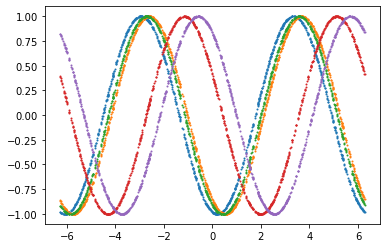

In [3]:
seed = 3
np.random.seed(seed)

cell_time = np.random.uniform(-2 * np.pi, 2 * np.pi, [1000, 1])

gene0_phase = np.random.uniform(0, 2 * np.pi, [1, 30])
# gene0_phase = np.array([[0, np.pi / 2]])
gene0 = np.sin(cell_time - gene0_phase)

for i in range(5):
    plt.scatter(x=cell_time, y=gene0[:, i], s=1)

In [4]:
gene = np.hstack([gene0])

Auto tuning number of linear components...
Performing PCA...
Training Autoencoder with...
    0 linear dimensions...
epoch: 100/200, loss:  0.0536, time elapsed:  2.53s, time left:  2.53s
epoch: 200/200, loss:  0.0480, time elapsed:  4.67s, time left:  0.00s
[0.04803358390927315]
[0.1867467771809964, 0.00022909318834145128]
Have not found one. Suggest raise max_linear_dims. Use 0 linear components...


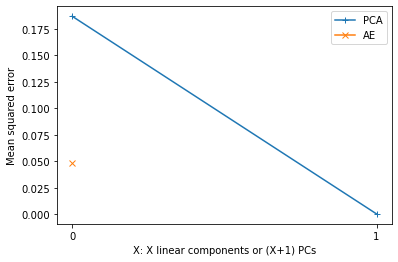

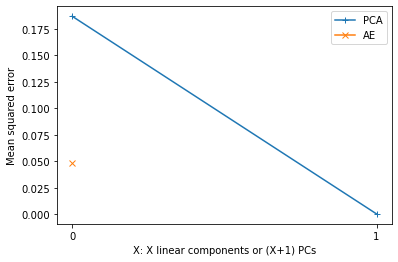

In [5]:
model = tuning.CyclumAutoTune(gene, epochs=200, early_stop=False, max_linear_dims=0)
model.show_elbow()
# model.show_structure()

In [6]:
model.train(gene, epochs=2000, verbose=100)

epoch: 100/2000, loss:  0.2664, time elapsed:  2.46s, time left:  46.77s
epoch: 200/2000, loss:  0.1970, time elapsed:  4.59s, time left:  41.28s
epoch: 300/2000, loss:  0.0983, time elapsed:  6.82s, time left:  38.62s
epoch: 400/2000, loss:  0.0594, time elapsed:  9.01s, time left:  36.05s
epoch: 500/2000, loss:  0.0534, time elapsed:  11.22s, time left:  33.67s
epoch: 600/2000, loss:  0.0491, time elapsed:  13.41s, time left:  31.30s
epoch: 700/2000, loss:  0.0464, time elapsed:  15.58s, time left:  28.94s
epoch: 800/2000, loss:  0.0462, time elapsed:  17.75s, time left:  26.62s
epoch: 900/2000, loss:  0.0435, time elapsed:  19.93s, time left:  24.36s
epoch: 1000/2000, loss:  0.0436, time elapsed:  22.15s, time left:  22.15s
epoch: 1100/2000, loss:  0.0422, time elapsed:  24.45s, time left:  20.01s
epoch: 1200/2000, loss:  0.0418, time elapsed:  26.63s, time left:  17.75s
epoch: 1300/2000, loss:  0.0430, time elapsed:  28.70s, time left:  15.45s
epoch: 1400/2000, loss:  0.0407, time 

Text(0, 0.5, 'Pseudotime')

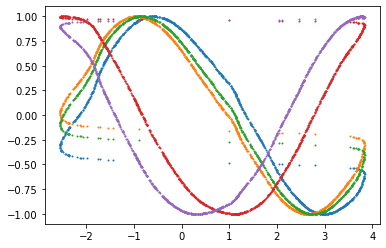

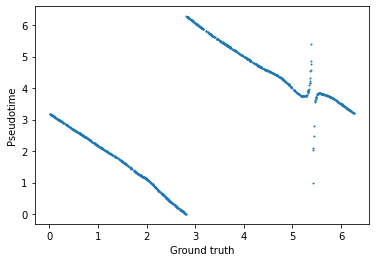

In [7]:
pseudotime = model.predict_pseudotime(gene)
plt.figure()
for i in range(5):
    plt.scatter(x=pseudotime, y=gene0[:, i], s=1)

plt.figure()
plt.scatter(cell_time % (2 * np.pi), pseudotime % (2 * np.pi), s=1)
plt.xlabel("Ground truth")
plt.ylabel("Pseudotime")